# 运营商数据　- EDA with python　（例子）

---

## 介绍

针对个人的运营商历史数据，进行数据分析

In [1]:
#coding:utf-8
import pandas as pd
import pymongo
from urllib import quote

import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
import re

from igraph import *


In [2]:
NEW_USER = "learner"
NEW_PASSWORD = quote("@Mongo!%&Server@")
# NEW_HOST_PORT = "10.47.54.77:27017"
NEW_HOST_PORT = "120.27.162.246:27017"
NEW_DATABASE = "machinelearning"
NEW_MONGO_URL = "mongodb://{0}:{1}@{2}/{3}".format(NEW_USER, NEW_PASSWORD, NEW_HOST_PORT, NEW_DATABASE)
MONGO_URL = NEW_MONGO_URL

with pymongo.MongoClient(host=MONGO_URL) as client:
    db_m = client.get_default_database()
    df_dict = {}
    for name in db_m.collection_names():
        collection = db_m.get_collection(name)
        df_dict[name] = pd.DataFrame(list(collection.find()))
    print(db_m.collection_names())

[u'flow', u'info', u'meal', u'sms', u'call', u'system.profile']


flow是个人流量数据

In [3]:
df_dict['flow'].head(5)

,_id,cost,date,flow,flow_meal,location,method,phone,source,time
0,59b8eef344b8da36848c0273,0.00,2017-04-01,633KB,4G飞享套餐-88元B套餐,北京,CMNET,18838203075,国内流量:633KB,08:12:35
1,59b8eef344b8da36848c0274,0.00,2017-04-01,5MB599KB,4G飞享套餐-88元B套餐,北京,CMNET,18838203075,国内流量:5MB599KB,09:31:44
2,59b8eef344b8da36848c0275,0.00,2017-04-01,38MB1008KB,4G飞享套餐-88元B套餐,北京,CMNET,18838203075,国内流量:38MB1008,09:34:54
3,59b8eef344b8da36848c0276,0.00,2017-04-01,855KB,4G飞享套餐-88元B套餐,北京,CMNET,18838203075,国内流量:855KB,22:43:23
4,59b8eef344b8da36848c0277,0.00,2017-04-01,1KB,4G飞享套餐-88元B套餐,北京,CMNET,18838203075,国内流量:1KB,23:43:23


In [4]:
df_dict['flow'].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Columns: 10 entries, _id to time
dtypes: object(10)
memory usage: 97.8+ KB


In [5]:
df_dict['info'].head(5)

,_id,certification,name,phone,start_time
0,59b9fe2444b8da530982cc34,41020219******1012,孙来特,18838203075,2014-04-17


In [6]:
df_dict['meal'].head(5)

,_id,cost,date,lasts,name,phone
0,59b8eef244b8da36848c01e7,10.0,2017-04-27,20170401-20170430,手机上网10元套餐月功能费,18838203075
1,59b8eef244b8da36848c01e8,88.0,2017-04-30,20170401-20170430,4G飞享套餐-88元B套餐费,18838203075
2,59b8eef244b8da36848c01e9,10.0,2017-04-30,20170401-20170430,全球通套餐2012版省内主叫叠加包10元功能费,18838203075
3,59b8eef344b8da36848c0327,10.0,2017-05-31,20170501-20170531,全球通套餐2012版省内主叫叠加包10元功能费,18838203075
4,59b8eef344b8da36848c0328,10.0,2017-05-31,20170501-20170531,手机上网10元套餐月功能费,18838203075


In [7]:
df_dict['meal'].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 6 entries, _id to phone
dtypes: float64(1), object(5)
memory usage: 840.0+ bytes


In [8]:
df_dict['sms'].head(5)

,_id,cost,date,location,method,phone,pnum,time,type
0,59b8eef344b8da36848c0323,0.1,2017-04-11,郑州,短信发,18838203075,13311059691,23:08:12,短信
1,59b8eef344b8da36848c0324,0.0,2017-04-19,郑州,梦网短信,18838203075,18838203075,19:43:52,梦网
2,59b8eef344b8da36848c0325,0.0,2017-04-19,郑州,梦网短信,18838203075,18838203075,19:43:52,梦网
3,59b8eef344b8da36848c0326,0.0,2017-04-19,郑州,梦网短信,18838203075,18838203075,19:43:52,梦网
4,59b8eef344b8da36848c047b,0.0,2017-05-16,郑州,短信发,18838203075,00447537410247,11:07:41,短信


In [9]:
df_dict['sms'].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 9 entries, _id to type
dtypes: float64(1), object(8)
memory usage: 1.5+ KB


In [10]:
df_dict['call'].head(5)

,_id,cost,date,duration,location,meal,meal_source,method,phone,pnum,time,type
0,59b8eef344b8da36848c01ea,0.0,2017-04-01,68,北京,4G飞享套餐-88元B套餐,,被叫,18838203075,15321970297,10:04:25,本地
1,59b8eef344b8da36848c01eb,0.0,2017-04-03,25,北京,4G飞享套餐-88元B套餐,,被叫,18838203075,01069795368,10:57:25,本地
2,59b8eef344b8da36848c01ec,0.0,2017-04-03,121,北京,4G飞享套餐-88元B套餐,免费通话时长:3分钟,主叫,18838203075,15321970297,11:03:54,本地
3,59b8eef344b8da36848c01ed,0.0,2017-04-03,67,北京,4G飞享套餐-88元B套餐,,被叫,18838203075,13598086295,13:41:09,省际长途
4,59b8eef344b8da36848c01ee,0.0,2017-04-04,19,北京,4G飞享套餐-88元B套餐,,被叫,18838203075,037165352607,09:03:23,省际长途


In [11]:
df_dict['call'].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Columns: 12 entries, _id to type
dtypes: float64(1), int64(1), object(10)
memory usage: 35.1+ KB


## 特征联合

In [12]:
df_dict['flow']['date'] = pd.to_datetime(df_dict['flow']['date']) 
df_dict['flow']['hour'] = pd.to_datetime(df_dict['flow']['time'], format='%H:%M:%S').dt.hour 


In [13]:
def trim_flow(str_flow):
    GB =0
    MB =0
    KB =0
    if 'GB' in str_flow:
        str_flow = str_flow.split('GB')
        GB = int(str_flow[0])
        str_flow = str_flow[1]
    if 'MB' in str_flow:
        str_flow = str_flow.split('MB')
        MB = int(str_flow[0])
        str_flow = str_flow[1]
    if 'KB' in str_flow:
        str_flow = str_flow.split('KB')
        KB = int(str_flow[0])
    
    return GB*1000 + MB + KB/1000.
df_dict['flow']['flow'] = df_dict['flow']['flow'].apply(trim_flow)

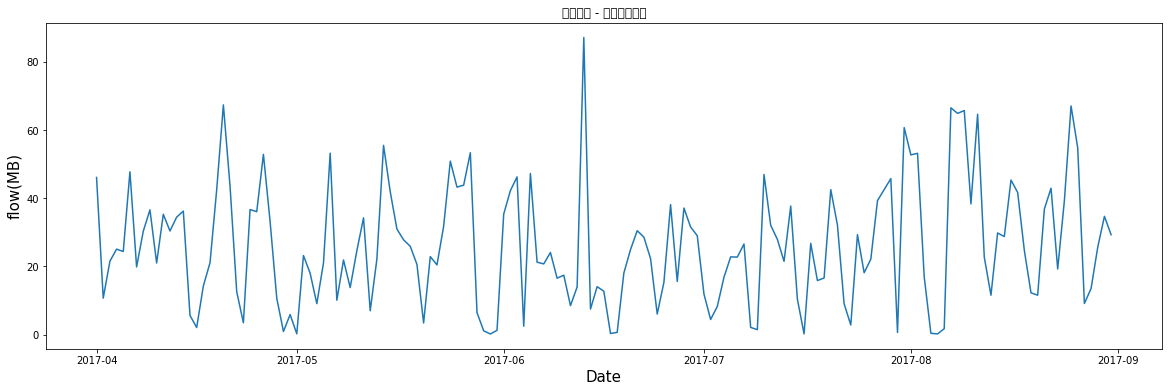

In [14]:
plt.figure(figsize=(20,6))

sum_group = df_dict['flow'][['flow', 'date']].groupby(['date'])['flow'].sum()
plt.plot(sum_group)
plt.xlabel('Date', fontsize=15)
plt.ylabel('flow(MB)', fontsize=15)
plt.title(u'时间序列 - 每天流量统计')
plt.show()

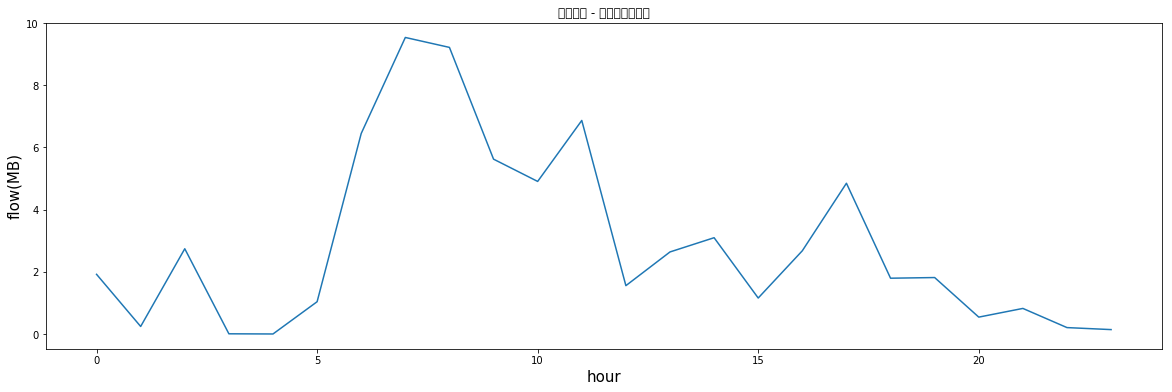

In [15]:
plt.figure(figsize=(20,6))

mean_group = df_dict['flow'][['flow', 'hour']].groupby(['hour'])['flow'].mean()
plt.plot(mean_group)
plt.xlabel('hour', fontsize=15)
plt.ylabel('flow(MB)', fontsize=15)
plt.title(u'时间序列 - 每小时平均流量')
plt.show()

In [16]:
df_dict['call']['date'] = pd.to_datetime(df_dict['call']['date']) 
df_dict['call']['hour'] = pd.to_datetime(df_dict['call']['time'], format='%H:%M:%S').dt.hour 

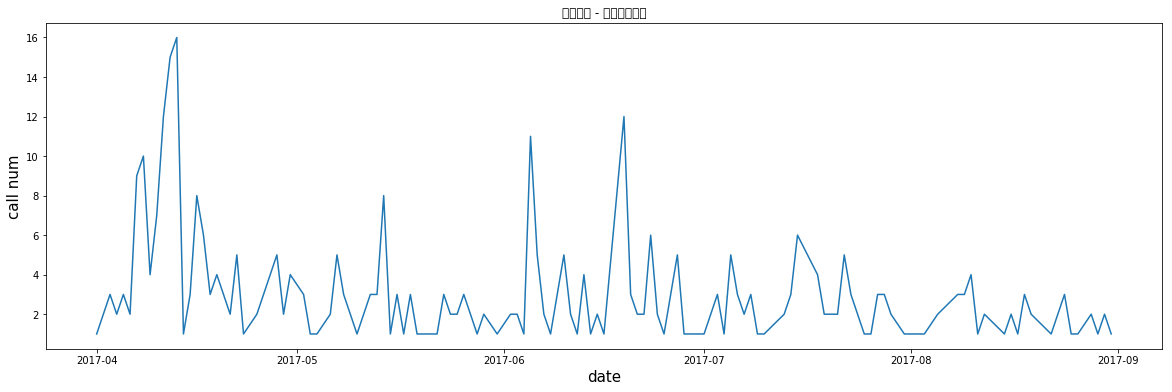

In [17]:
plt.figure(figsize=(20,6))

count_group = df_dict['call'][['_id', 'date']].groupby(['date'])['_id'].count()
plt.plot(count_group)
plt.xlabel('date', fontsize=15)
plt.ylabel('call num', fontsize=15)
plt.title(u'时间序列 - 每日电话数量')
plt.show()

## 特征生成
根据通话记录绘制关系图

In [18]:
g = Graph.TupleList(df_dict['call'][['phone', 'pnum']].itertuples(index=False), weights=False)


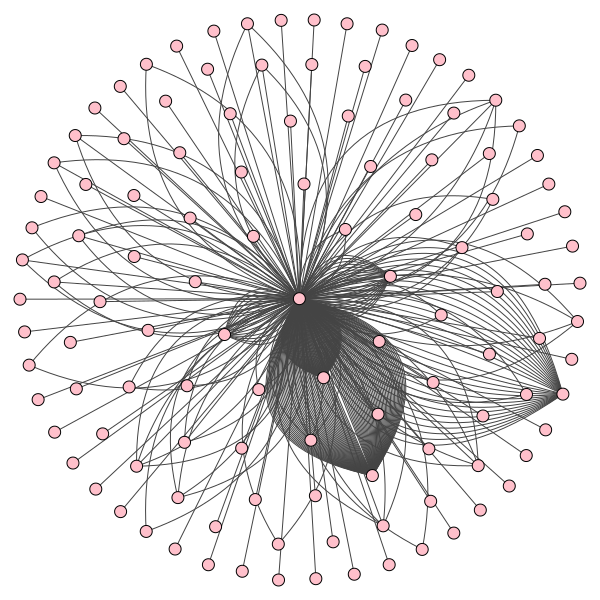

In [19]:

     
layout = g.layout("kk")
visual_style = {}
visual_style["vertex_size"] = 12
visual_style["vertex_color"] =["pink"]

visual_style["layout"] = layout
plot(g, **visual_style)

可以看到有特定的节点是高频率的通话

在此基础上实施Pagerank算法，infomap /walkrap 来提供边界权重，　权重可以作为特征.
也可以直接进行Community detection,检测社群.

总结：
ＥＤＡ是数据理解的前期阶段，通过可视化，人工学习数据特征，再通过特征联合，特征生成等方法构造出一些模型无法直接学习到的隐藏特征维度，增强模型效果。